In [76]:
import gdal
import numpy as np
import osgeo

def pad_tof_raster(country, shapefile):
    
    '''
    Increase the raster extent to match the boundas of a country's shapefile
    and fill with no data value.
    
    Attributes
    ----------
    country : str
        a string indicating the country files to import
    shapefile : .geojson or .shp file
        shapefile containing subnational administrative boundaries level 0-2
    '''
    
    # reproject shapefile
    shapefile = shapefile.to_crs("EPSG:4326")

    # identify min/max bounds for the country
    bounds = shapefile.geometry.bounds
    min_x = bounds.minx.min() 
    min_y = bounds.miny.min()
    max_x = bounds.maxx.max()
    max_y = bounds.maxy.max()
    print(f'Original bounds: ({min_x}, {min_y}, {max_x}, {max_y})')
    
    # round to the nearest .1 lat/lon
    # Lower_x: -87.6 -> -88.0 (math.floor)
    # Lower_x: 5.5 -> 5.0 (math.floor)

    # Upper_x: 11.2 -> 11.3 (math.ceil)
    # Upper_x: -82.5 -> -82.0 (math.ceil)
    # Upper_y: 11.22 -> 11.3 (math.ceil)
    # Upper_y: -11.22 -> -11.2 (math.ceil)
    
    # So lower is math.floor, upper is math.ceil always (!!)
    lower_x = math.floor(min_x * 1) / 1
    lower_y = math.floor(min_y * 1) / 1 
    upper_x = (math.ceil(max_x * 1) / 1)
    upper_y = (math.ceil(max_y * 1) / 1)
    print(f'Padding bounds: ({lower_x}, {lower_y}, {upper_x}, {upper_y})')
          
    # create tif with new output bounds, filled with no data value
    warp_options = gdal.WarpOptions(format='Gtiff', 
                                    dstSRS='EPSG:4326',
                                    dstNodata=255,
                                    #targetAlignedPixels=True,
                                    outputBounds=[lower_x, lower_y, upper_x, upper_y],
                                    resampleAlg='near',
                                    outputType=osgeo.gdalconst.GDT_Byte,
                                    creationOptions=['TFW=YES', 'COMPRESS=LZW']
                                   )
    
    ds = gdal.Warp(f'{country}/{country}_tof_padded.tif', # destination file
                   f'{country}/{country}_tof.tif',        # original file
                   options=warp_options)                  # define specifics
    
    return None

In [77]:
import geopandas as gpd
import math
pad_tof_raster('Costa Rica', gpd.read_file('data/costa-rica-wgs84.geojson'))

Original bounds: (-87.10184904046184, 5.49857041364919, -82.55231898795682, 11.219757912256666)
Padding bounds: (-88.0, 5.0, -82.0, 12.0)


In [1]:
import hickle as hkl
import numpy as np
x = hkl.load("../../project-monitoring/tiles/1753/1206/raw/misc/dem_1753X1206Y.hkl")

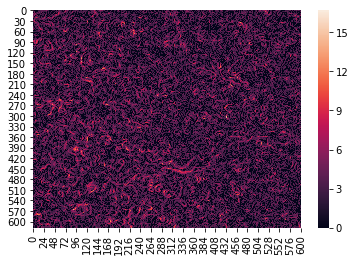

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.heatmap(x)